   Minutes_per_Game  FG_Percentage  Games_Played  Points_per_Game
0         32.483571       0.379231            51        22.524936
1         29.308678       0.428968            75        24.328776
2         33.238443       0.432864            66        13.998518
3         37.615149       0.409886            57        18.327494
4         28.829233       0.441936            50        17.625273
               Model      RMSE        R²       MAE
0  Linear Regression  4.087720  0.045612  3.228382
1      Random Forest  3.672559  0.229629  2.994567
2            XGBoost  3.865552  0.146535  3.100480


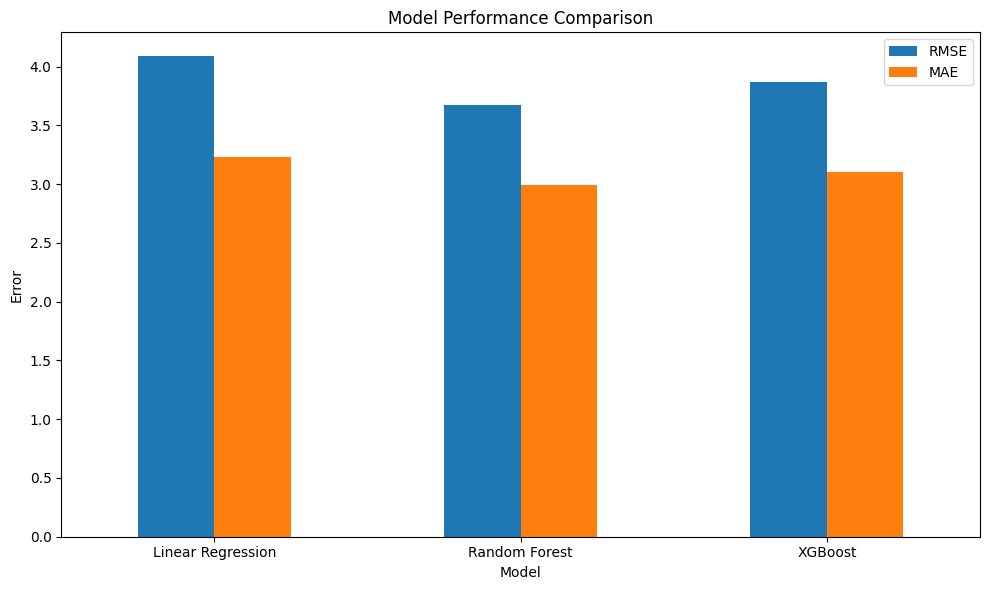

In [1]:
# NBA Player Performance Prediction - Capstone Project

# This script presents a predictive model for NBA player scoring (Points Per Game)
# using machine learning techniques. It includes data preprocessing, model training,
# evaluation, and performance comparison.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic NBA-like dataset
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Minutes_per_Game': np.random.normal(30, 5, n),
    'FG_Percentage': np.random.normal(0.45, 0.05, n),
    'Games_Played': np.random.randint(50, 82, n),
    'Points_per_Game': np.random.normal(20, 5, n)
})
print(data.head())

# Define features and target
X = data[['Minutes_per_Game', 'FG_Percentage', 'Games_Played']]
y = data['Points_per_Game']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=20, learning_rate=0.1, random_state=42, verbosity=0)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    })

results_df = pd.DataFrame(results)
print(results_df)

# Plot model performance
results_df.set_index('Model')[['RMSE', 'MAE']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
